In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import gensim
import pyLDAvis.gensim
import numpy as np
import logging
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import time
from pprint import pprint

In [2]:
data = pd.read_csv("./absconfull.csv") ############
data = data.drop(data.index[50:]) ###################### decrease size
data = data.drop(['Unnamed: 0'], axis=1)
#print(data)

In [4]:
dfWordList = pd.read_excel("./word_cor.xlsx")
#print(dfWordList)

dfWordDel = dfWordList[dfWordList["수정"] == "삭제"]
dfWordMod = dfWordList[dfWordList["수정"] != "삭제"]
#print(dfWordMod)

seriesDelete = dfWordDel["원본"]
stopword = []
for word in seriesDelete.values:
    stopword.append(word)
#print(listDelete)

seriesModify = dfWordMod["원본"]
modiword = []
for word in seriesModify.values:
    modiword.append(word)
#print(len(modiword))

seriesModify2 = dfWordMod["수정"]
modiword2 = []
for word in seriesModify2.values:
    modiword2.append(word)
#print(len(modiword2))

C:\Users\uni61\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\uni61\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\uni61\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [5]:
okt = Okt()
def oktTokenizer(raw, stopword=stopword, pos=['Noun', 'Alpha']):
    list = []
    for word, tag in okt.pos(raw, #raw data
                                 norm=True, #normalize
                                 stem=True #stemming
                                 ):
        if len(word) > 1 and tag in pos and word not in stopword: 
            if tag == 'Alpha':
                word = word.lower()
            if word in modiword:
                word = modiword2[modiword.index(word)]
            list.append(word)        
    return list

In [6]:
tokenized = data["abscon"].apply(lambda row: oktTokenizer(row))
#print(tokenized)
tokenized.to_excel("C:\\Users\\uni61\PycharmProjects/untitled1/0911token_full.xls") ##############
print("========= tokenization completed =========")

<>:3: DeprecationWarning: invalid escape sequence \P
<>:3: DeprecationWarning: invalid escape sequence \P
<ipython-input-6-6cc9197821c5>:3: DeprecationWarning: invalid escape sequence \P
  tokenized.to_excel("C:\\Users\\uni61\PycharmProjects/untitled1/0911token_full.xls") ##############


========= tokenization completed =========


In [7]:
#lda
id2word = gensim.corpora.Dictionary(tokenized)

wordlist = []
for i in range(len(id2word)):
    #print(id2word[i])
    wordlist.append(id2word[i])
#print(wordlist)
seriesWordlist = pd.Series(wordlist)
seriesWordlist.to_excel("C:\\Users\\uni61\PycharmProjects/untitled1/0911wordlist_full.xls") #################

corpus=[id2word.doc2bow(text) for text in tokenized]
#print("id2word for each document : ", corpus)
print("# words in total : ", len(id2word))
print("# documents : ", len(corpus))

# words in total :  1892
# documents :  50


<>:10: DeprecationWarning: invalid escape sequence \P
<ipython-input-7-f18c7f957595>:10: DeprecationWarning: invalid escape sequence \P
  seriesWordlist.to_excel("C:\\Users\\uni61\PycharmProjects/untitled1/0911wordlist_full.xls") #################


In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    perplexity_values = []
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                iterations=1000,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                per_word_topics=True)
        model_list.append(model)
        perplexitymodel = model.log_perplexity(corpus)
        perplexity_values.append(perplexitymodel)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, perplexity_values, coherence_values

In [10]:
#start = time.time()
model_list, perplexity_values, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=tokenized,
                                                        start=2,
                                                        limit=10, #####
                                                        step=1)
#print("time : ", ( time.time() - start )/60, "min")

2
3
4
5
6
7
8
9


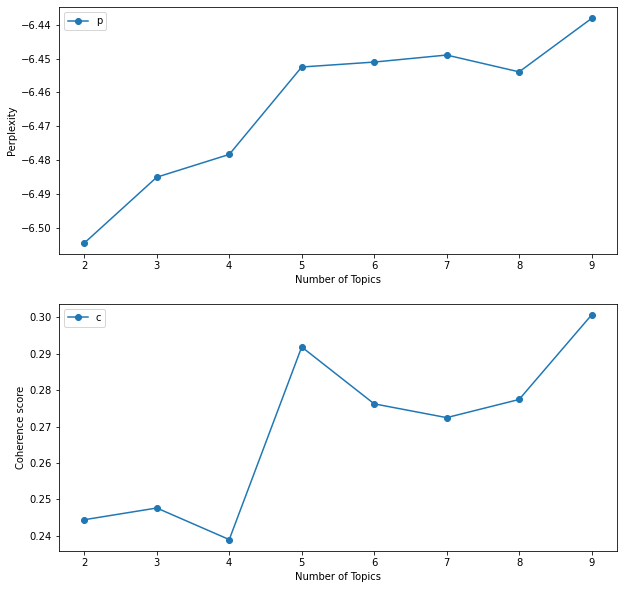

In [11]:
limit=10 ######
start=2
step=1
x = range(start, limit, step)


fig, ax = plt.subplots(2,1, figsize=(10, 10))

ax[0].plot(x, perplexity_values, marker='o')
ax[0].set_xlabel("Number of Topics")
ax[0].set_ylabel("Perplexity")
ax[0].legend(("perplexity"), loc='best')

ax[1].plot(x, coherence_values, marker='o')
ax[1].set_xlabel("Number of Topics")
ax[1].set_ylabel("Coherence score")
ax[1].legend(("coherence_values"), loc='best')
plt.show()

In [12]:
for m, pv in zip(x, perplexity_values):
  print("Num Topics =", m, " has Perplexity Value of", round(pv, 4))

for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Perplexity Value of -6.5044
Num Topics = 3  has Perplexity Value of -6.485
Num Topics = 4  has Perplexity Value of -6.4783
Num Topics = 5  has Perplexity Value of -6.4525
Num Topics = 6  has Perplexity Value of -6.4511
Num Topics = 7  has Perplexity Value of -6.449
Num Topics = 8  has Perplexity Value of -6.4539
Num Topics = 9  has Perplexity Value of -6.4382
Num Topics = 2  has Coherence Value of 0.2444
Num Topics = 3  has Coherence Value of 0.2476
Num Topics = 4  has Coherence Value of 0.239
Num Topics = 5  has Coherence Value of 0.2919
Num Topics = 6  has Coherence Value of 0.2762
Num Topics = 7  has Coherence Value of 0.2725
Num Topics = 8  has Coherence Value of 0.2774
Num Topics = 9  has Coherence Value of 0.3006


In [14]:
a = int(input("set the number of topics "))
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=a,
                                                random_state=100,
                                                update_every=1,
                                                iterations=1000,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                per_word_topics=True)
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

set the number of topics  9


[(0,
  '0.029*"시스템" + 0.025*"교육" + 0.024*"설계" + 0.021*"교수" + 0.015*"개발" + '
  '0.015*"윤리" + 0.015*"의료" + 0.013*"학습자" + 0.013*"설명" + 0.012*"연구" + '
  '0.010*"이론" + 0.010*"학습" + 0.009*"관련" + 0.009*"정보" + 0.008*"인성" + 0.008*"작업" '
  '+ 0.008*"방법" + 0.008*"기법" + 0.007*"제공" + 0.007*"활용" + 0.007*"기능" + '
  '0.006*"지식" + 0.006*"자료" + 0.006*"문제" + 0.006*"자동화" + 0.006*"구조" + '
  '0.006*"구현" + 0.005*"설문" + 0.005*"서비스" + 0.005*"분야"'),
 (1,
  '0.040*"학습" + 0.025*"교육" + 0.018*"학생" + 0.016*"학습자" + 0.012*"정보" + '
  '0.011*"코스웨어" + 0.010*"활용" + 0.010*"교수" + 0.010*"연구" + 0.010*"논문" + '
  '0.009*"자료" + 0.008*"시뮬레이션" + 0.008*"구성" + 0.008*"사용" + 0.008*"상호작용" + '
  '0.008*"구현" + 0.008*"통합" + 0.008*"참여" + 0.007*"기능" + 0.007*"설계" + 0.007*"대학" '
  '+ 0.007*"토론" + 0.007*"wbi" + 0.006*"제공" + 0.006*"개발" + 0.006*"사이버" + '
  '0.006*"컴퓨터" + 0.006*"내용" + 0.006*"이용" + 0.006*"효과"'),
 (2,
  '0.046*"교육" + 0.039*"학습" + 0.024*"가상" + 0.015*"연구" + 0.013*"시스템" + '
  '0.012*"학습자" + 0.011*"설계" + 0.010*"형태" + 0.009*"컴퓨터" + 0.00

In [16]:
title = input("set the title of html file ")
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
pyLDAvis.save_html(vis, title+".html")

set the title of html file  lda
